# code to test multifiles support

In [131]:
from nbimports import *

In [132]:
filename = "../data/user/data_11052022_170124.csv"
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']
df1 = utils.format_from_df(data)

In [133]:
filename = "../data/user/data_11052022_170918.csv"
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']
df2 = utils.format_from_df(data)

In [134]:
df1['card_id'] = str(0)
df2['card_id'] = str(1)
df = pd.concat([df1, df2])

In [135]:
c0_si = select(df, card_id=0)['segment_id']
c1_si = select(df, card_id=1)['segment_id']

In [136]:
c0_si = np.random.choice(c0_si, 10, replace=False)
c1_si = np.random.choice(c1_si, 10, replace=False)

ValueError: 'a' cannot be empty unless no samples are taken

In [120]:
arr1 = np.r_[np.zeros(10), np.ones(10)]
arr2 = np.r_[c0_si, c1_si]
arr = np.stack([arr1, arr2]).T

In [121]:
arr

array([[  0.,  56.],
       [  0.,   7.],
       [  0.,  70.],
       [  0.,  64.],
       [  0.,  12.],
       [  0.,  27.],
       [  0.,  69.],
       [  0.,  46.],
       [  0.,  62.],
       [  0.,  56.],
       [  1., 175.],
       [  1.,  19.],
       [  1., 211.],
       [  1., 145.],
       [  1.,  19.],
       [  1.,  97.],
       [  1., 147.],
       [  1., 174.],
       [  1., 148.],
       [  1.,  70.]])

In [122]:
np.random.shuffle(arr)

In [123]:
arr

array([[  1., 174.],
       [  0.,  46.],
       [  0.,  70.],
       [  0.,  69.],
       [  1., 211.],
       [  1.,  97.],
       [  0.,  27.],
       [  1., 145.],
       [  0.,  56.],
       [  1.,  70.],
       [  0.,   7.],
       [  1., 175.],
       [  1., 148.],
       [  0.,  64.],
       [  1., 147.],
       [  1.,  19.],
       [  1.,  19.],
       [  0.,  12.],
       [  0.,  56.],
       [  0.,  62.]])

In [124]:
res = pd.DataFrame()
for row in arr:
    selected = select(df, card_id=row[0], segment_id=row[1])
    print(row, selected.shape[0])
    res = pd.concat([res, selected])

[  1. 174.] 131
[ 0. 46.] 76
[ 0. 70.] 225
[ 0. 69.] 229
[  1. 211.] 20
[ 1. 97.] 40
[ 0. 27.] 75
[  1. 145.] 129
[ 0. 56.] 76
[ 1. 70.] 46
[0. 7.] 68
[  1. 175.] 148
[  1. 148.] 125
[ 0. 64.] 38
[  1. 147.] 144
[ 1. 19.] 156
[ 1. 19.] 156
[ 0. 12.] 65
[ 0. 56.] 76
[ 0. 62.] 53


In [125]:
for i, grp in res.groupby(['card_id', 'segment_id']):
    print(i)

(0, 7)
(0, 12)
(0, 27)
(0, 46)
(0, 56)
(0, 62)
(0, 64)
(0, 69)
(0, 70)
(1, 19)
(1, 70)
(1, 97)
(1, 145)
(1, 147)
(1, 148)
(1, 174)
(1, 175)
(1, 211)


In [126]:
res.head()

,key,t0,t0_norm,ts,stroke_id,segment_id,x,y,p,x_,...,x0,y0,p0,x1,y1,p1,s,angle,da,card_id
11646,3943194_54850,3943194,0.871403,54850,90,174,0.492202,0.606036,0.045519,0.119155,...,0.178381,0.136374,0.018514,-0.009404,0.001260,-0.000310,0.948795,-204.336764,0.199208,1
11647,3943207_54860,3943207,0.871477,54860,90,174,0.485677,0.596525,0.047893,0.112630,...,0.167894,0.132801,0.018417,-0.009869,-0.000664,-0.000271,0.989164,-204.136379,0.207561,1
11648,3943207_54870,3943207,0.871477,54870,90,174,0.480366,0.585679,0.048724,0.107319,...,0.157330,0.127678,0.018985,-0.010182,-0.002477,-0.000020,1.047854,-203.964873,0.201891,1
11649,3943224_54880,3943224,0.871574,54880,90,174,0.477767,0.576533,0.048536,0.104720,...,0.146921,0.121244,0.020394,-0.010314,-0.004119,0.000446,1.110576,-203.823600,0.183108,1
11650,3943237_54890,3943237,0.871648,54890,90,174,0.475757,0.566085,0.047727,0.102710,...,0.136946,0.113711,0.022650,-0.010232,-0.005557,0.001067,1.164348,-203.706025,0.157426,1


In [127]:
res['plot_key'] = res.apply(lambda x: str(x['card_id'])+'_'+str(x['segment_id']), axis=1)

In [101]:
import plotly.express as px

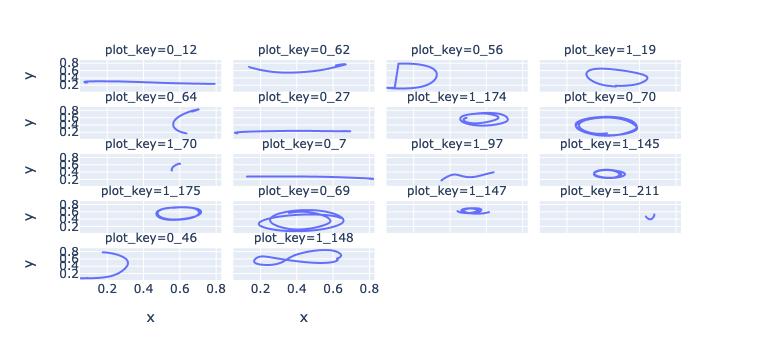

In [118]:
px.line(data_frame=res, x='x', y='y',
        facet_col='plot_key', facet_col_wrap=4)

In [119]:
for i, grp in res.groupby('plot_key'):
    print(i)

0_12
0_27
0_46
0_56
0_62
0_64
0_69
0_7
0_70
1_145
1_147
1_148
1_174
1_175
1_19
1_211
1_70
1_97


In [128]:
selected = {'points': [{'curveNumber': 0, 'pointNumber': 68, 'pointIndex': 68, 'x': 9.947559683701414, 'y': 16.244934210969763, 'customdata': ['0', 68]}, {'curveNumber': 1, 'pointNumber': 158, 'pointIndex': 158, 'x': 8.80025799858752, 'y': 14.363773815871575, 'customdata': ['1', 158]}, {'curveNumber': 1, 'pointNumber': 160, 'pointIndex': 160, 'x': 8.347910939928482, 'y': 14.498161040587354, 'customdata': ['1', 160]}, {'curveNumber': 1, 'pointNumber': 162, 'pointIndex': 162, 'x': 8.54865116355359, 'y': 14.889484069341137, 'customdata': ['1', 162]}, {'curveNumber': 1, 'pointNumber': 163, 'pointIndex': 163, 'x': 9.481355248331752, 'y': 14.801372320060423, 'customdata': ['1', 163]}, {'curveNumber': 1, 'pointNumber': 164, 'pointIndex': 164, 'x': 9.368337217032618, 'y': 15.298186212759505, 'customdata': ['1', 164]}, {'curveNumber': 1, 'pointNumber': 165, 'pointIndex': 165, 'x': 9.515162416631565, 'y': 14.362737894503915, 'customdata': ['1', 165]}, {'curveNumber': 1, 'pointNumber': 166, 'pointIndex': 166, 'x': 8.82023057658606, 'y': 15.177213680337612, 'customdata': ['1', 166]}, {'curveNumber': 1, 'pointNumber': 168, 'pointIndex': 168, 'x': 7.993106362325995, 'y': 15.410628499016294, 'customdata': ['1', 168]}], 'range': {'x': [7.954931572840816, 12.215433208995107], 'y': [14.253377617363371, 16.668477920922253]}}

In [130]:
np.array([p['customdata'] for p in selected['points']]).astype(int)

array([[  0,  68],
       [  1, 158],
       [  1, 160],
       [  1, 162],
       [  1, 163],
       [  1, 164],
       [  1, 165],
       [  1, 166],
       [  1, 168]])